In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/StudentsPerformance.csv')
df
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [3]:
# Create the directory for raw data
!mkdir -p Student_performance_Project/data_raw

# Move your dataset into this folder (assuming it's already saved as raw_frailty_data.csv)
!mv StudentsPerformance.csv Student_performance_Project/data_raw/raw_data.csv


In [4]:
# Create directories for cleaned data and source code
!mkdir -p Student_performance_Project/data_clean
!mkdir -p Student_performance_Project/src

# Create a Python script to clean the data (for example, handling missing values)
!touch Student_performance_Project/src/clean_data.py

In [5]:
# Using the isnull method to identify and count missing values in each column
missing_values_count = df.isnull().sum()

# Displaying Missing Values Count
print("Missing values count in each column:")
print(missing_values_count)

# Checking for overall missing values using the isnull().any().sum() approach
total_missing = df.isnull().any().sum()
if total_missing > 0:
    print(f"There are missing values in {total_missing} columns.")
else:
    print("No missing values in the DataFrame.")


Missing values count in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
No missing values in the DataFrame.


In [6]:

import pandas as pd
import os
# Ensure the directory exists
output_dir = 'Student_performance_Project/data_clean'

# Load the dataset
file_path = 'Student_performance_Project/data_raw/raw_data.csv'
data = pd.read_csv(file_path)

# Step 1: Standardize column names (lowercase and replace spaces with underscores)
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Step 2: Clean specific categorical columns if necessary
# For example, checking for inconsistent values
categorical_columns = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

# Step 3: (Optional) Remove duplicates if any exist
data.drop_duplicates(inplace=True)

# Step 4: Ensure data types are appropriate
# Since data types look fine, no changes are necessary here.

# Export the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_students_performance.csv'
data.to_csv(cleaned_file_path, index=False)

print("Completed with Data cleaning and saved to", cleaned_file_path)

!mv cleaned_students_performance.csv Student_performance_Project/data_clean/cleaned_data.csv

Completed with Data cleaning and saved to cleaned_students_performance.csv


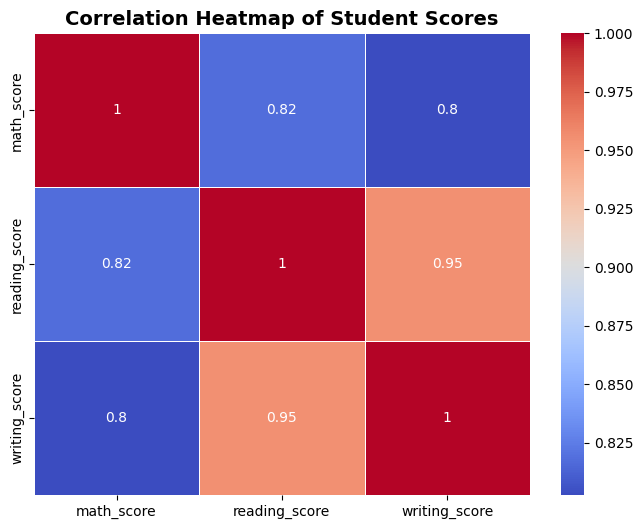

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation
corr_matrix = data[['math_score', 'reading_score', 'writing_score']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Student Scores', fontsize=14, fontweight='bold')
plt.show()


<ipython-input-9-2720468c59bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math_score', data=data, palette='Set3')


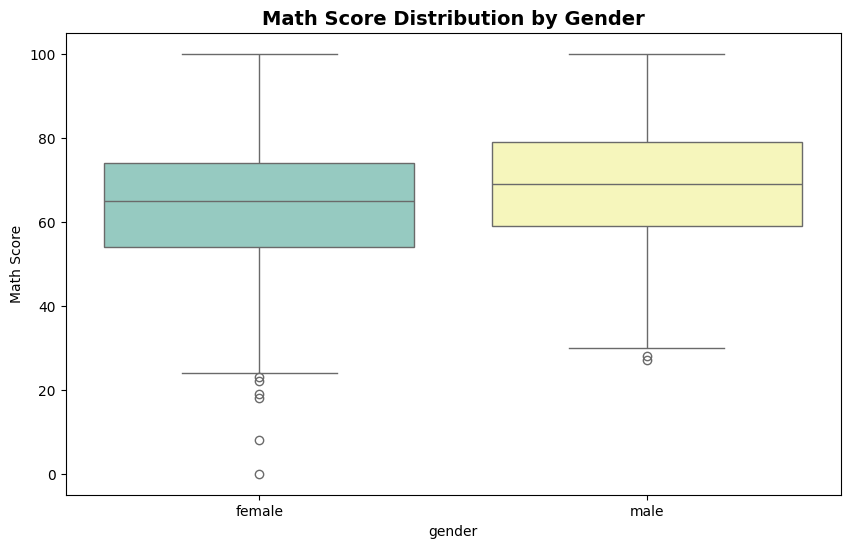

<ipython-input-9-2720468c59bd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='reading_score', data=data, palette='Set2')


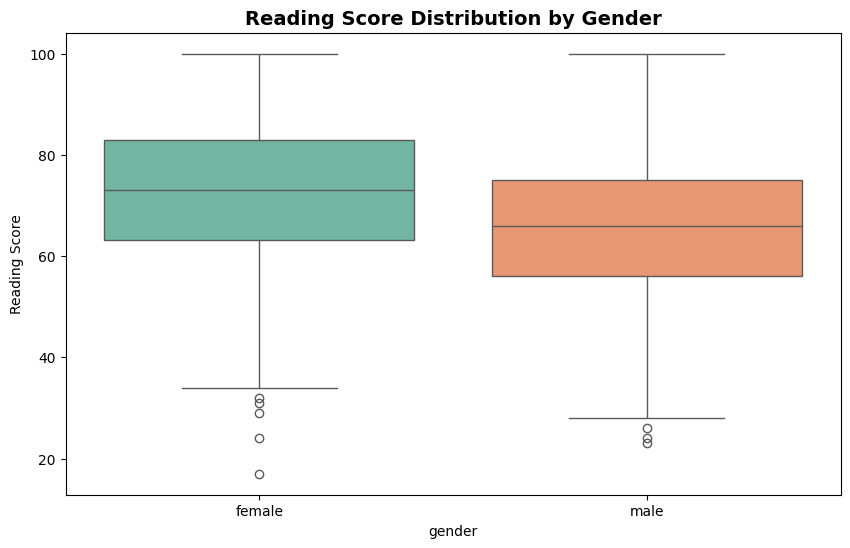

<ipython-input-9-2720468c59bd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='writing_score', data=data, palette='Set1')


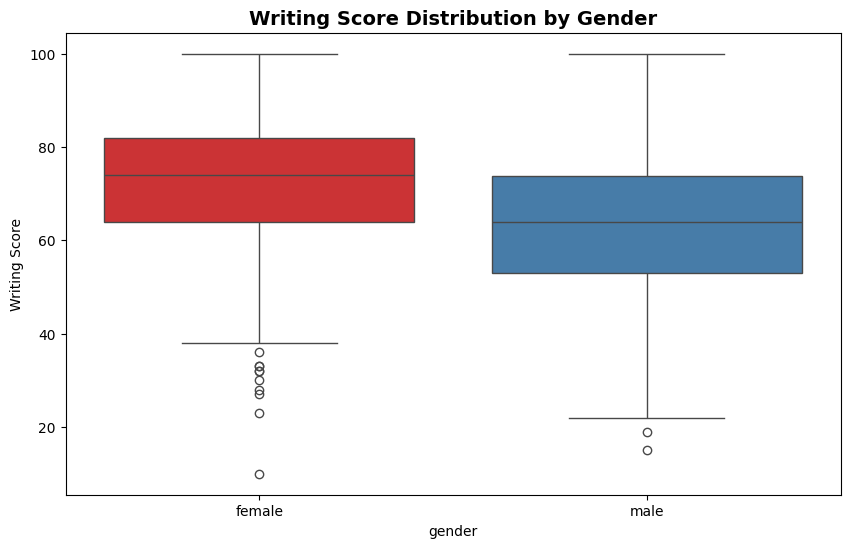

In [9]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math_score', data=data, palette='Set3')
plt.title('Math Score Distribution by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Math Score')
plt.show()

# Repeat for reading and writing scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='reading_score', data=data, palette='Set2')
plt.title('Reading Score Distribution by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Reading Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='writing_score', data=data, palette='Set1')
plt.title('Writing Score Distribution by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Writing Score')
plt.show()


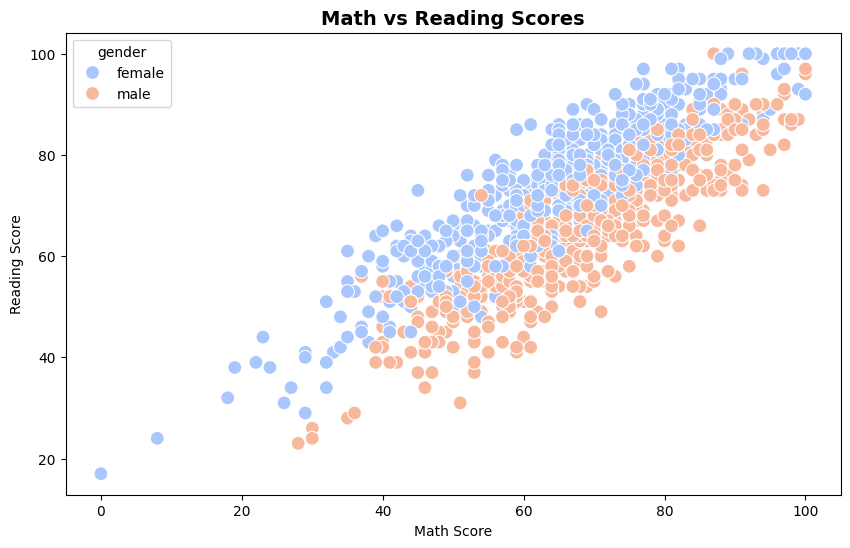

In [10]:
# Scatter plot between math and reading scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='math_score', y='reading_score', hue='gender', data=data, palette='coolwarm', s=100)
plt.title('Math vs Reading Scores', fontsize=14, fontweight='bold')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()


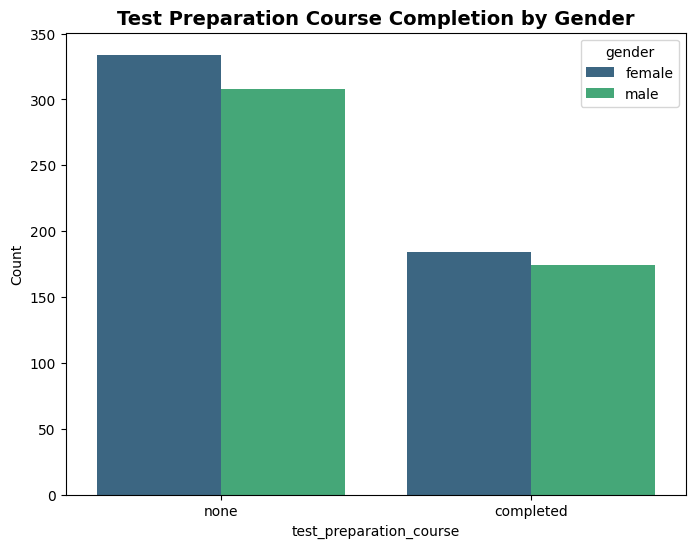

In [12]:
# Count plot for test preparation course by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='test_preparation_course', hue='gender', data=data, palette='viridis')
plt.title('Test Preparation Course Completion by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.show()


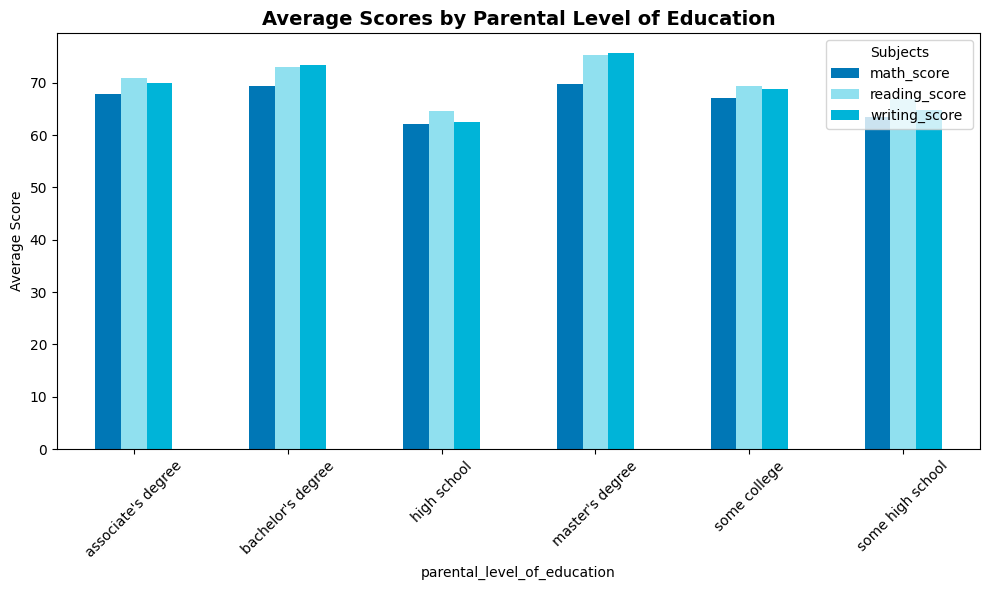

In [15]:
# Calculate average scores by parental level of education
average_scores_by_parent_education = data.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()

# Plot the bar plot
average_scores_by_parent_education.plot(kind='bar', figsize=(10, 6), color=['#0077b6', '#90e0ef', '#00b4d8'])
plt.title('Average Scores by Parental Level of Education', fontsize=14, fontweight='bold')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Subjects')
plt.tight_layout()
plt.show()
